In [195]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from skimage import io
from skimage.measure import compare_psnr
%matplotlib inline

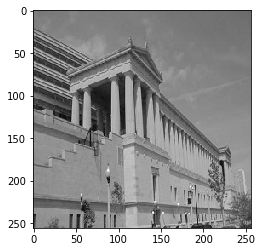

In [196]:
image = io.imread('stone.jpg')
image = image[:,:,1]
plt.imshow(image,cmap='gray')

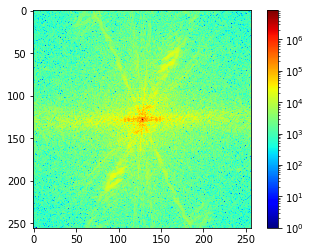

In [197]:
from matplotlib.colors import LogNorm

image_freq = np.fft.fft2(image)
shift_image_freq = np.fft.fftshift(image_freq)
plt.imshow(np.abs(shift_image_freq), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

In [198]:
m,n = image.shape
out = np.zeros((2*m-1,2*n-1), dtype='uint8')
out[::2,::2] = image
print(image)
print(out.shape)

[[119 121 122 ... 106 106 106]
 [123 124 125 ... 106 106 106]
 [124 125 125 ... 106 106 106]
 ...
 [ 53  67 107 ...  51  55  63]
 [ 52  79 111 ...  55  53  60]
 [ 54  89 112 ...  63  65  59]]
(511, 511)


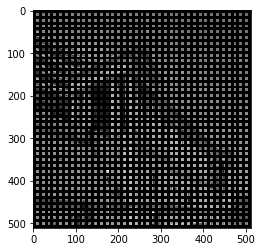

In [199]:
plt.imshow(out, cmap='gray')
plt.imsave('broken.png', out, cmap='gray', format='png')

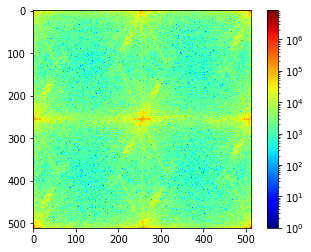

In [200]:
out_freq = np.fft.fft2(out)
shift_out_freq = np.fft.fftshift(out_freq)
plt.imshow(np.abs(shift_out_freq), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

In [201]:
filtering = np.array([[0.25,0.5,0.25],[0.5,1,0.5],[0.25,0.5,0.25]])
pad_filtering = np.pad(filtering, pad_width=254, mode='constant', constant_values=0)
H = np.fft.fft2(pad_filtering)
shift_H = np.fft.fftshift(H)

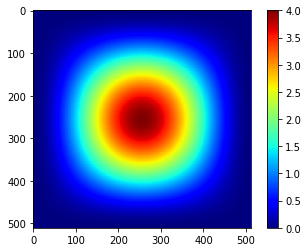

In [202]:
plt.imshow(np.abs(shift_H), cmap='jet')
plt.colorbar()

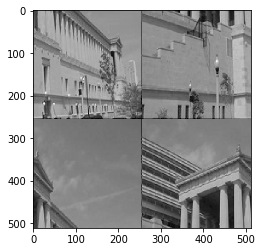

In [203]:
image_recover_freq = np.multiply(out_freq,shift_H)
image_recover = np.fft.ifft2(image_recover_freq)
plt.imshow(np.abs(image_recover), cmap='gray')

In [204]:
i,j = image_recover.shape
image1 = image_recover[0:int(i/2), 0:int(j/2)] 
image2 = image_recover[0:int(i/2), int(j/2)-1:j]
image3 = image_recover[int(i/2)-1:i, 0:int(j/2)]
image4 = image_recover[int(i/2)-1:i, int(j/2)-1:j]

image_sub1 = np.concatenate((image4,image2))
image_sub2 = np.concatenate((image3,image1))
image_full_recover = np.concatenate((image_sub1,image_sub2), axis=1)

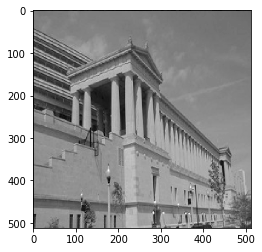

In [205]:
plt.imshow(np.abs(image_full_recover), cmap='gray')

In [206]:
x = np.linspace(-np.pi, np.pi, 511)
y = np.linspace(-np.pi, np.pi, 511)

X, Y = np.meshgrid(x, y)
H = 1+0.5*2*np.cos(X)+0.5*2*np.cos(Y)+0.25*2*np.cos(X+Y)+ 0.25*2*np.cos(X-Y)

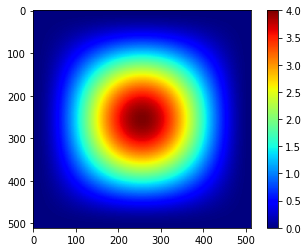

In [207]:
plt.imshow(np.abs(H), cmap='jet')
plt.colorbar()

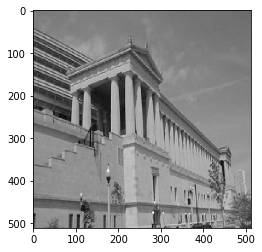

In [208]:
image_recover_freq = np.multiply(out_freq,H)
image_recover = np.fft.ifft2(image_recover_freq)
plt.imshow(np.abs(image_recover), cmap='gray')

In [209]:
image_recover.shape

(511, 511)